<a href="https://colab.research.google.com/github/nursnaaz/25DaysInMachineLearning/blob/master/Portuguese_Banking_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Library install 
!pip install pandas-profiling --upgrade

In [97]:
!pip install mlxtend

In [163]:
#Libabry Import
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt 
import numpy as np


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier





plt.rc("font", size=100)
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
import os

In [4]:
os.getcwd()

'/content'

In [5]:
!pwd

/content


In [6]:
!ls

bank-additional-full.csv  sample_data


In [7]:
#Load the data 
data = pd.read_csv("bank-additional-full.csv", sep=";")

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
data.shape

(41188, 21)

In [12]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
pandas_profiling.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [36]:
data.drop_duplicates(inplace = True)

In [37]:
data['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [39]:
data["education"].replace({'basic.9y':'Basic','basic.4y':'Basic', 'basic.6y':'Basic'}, inplace = True)

In [40]:
data['education'].value_counts()

Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [41]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
data['y'] = np.where(data['y']=='yes',1,0)

In [48]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.186870,254.315961,2.623572,954.306363,0.189078,0.016028,93.534250,-40.245331,3.550668,5164.136990,0.129667
blue-collar,39.555820,264.557549,2.558630,985.158867,0.122555,0.248903,93.656619,-41.376354,3.771879,5175.613488,0.068951
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.037253,273.909779,2.478463,897.818393,0.327707,-0.697963,93.431084,-38.577474,2.769969,5122.261525,0.252619
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.925637,258.491303,2.588606,979.964457,0.155029,0.175548,93.634848,-41.289892,3.699441,5171.604159,0.081422
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [49]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,44.898937,253.836044,2.613316,968.633268,0.168727,0.163717,93.606496,-40.706636,3.715333,5170.866233,0.103231
married,42.307411,257.466996,2.573091,967.238754,0.155652,0.183656,93.597440,-40.271012,3.745829,5171.847029,0.101561
single,33.156866,261.554912,2.534244,949.892598,0.211432,-0.167840,93.517363,-40.919068,3.317548,5155.203416,0.140090
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.150000


In [50]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.164162,263.054987,2.559623,974.876039,0.141065,0.191256,93.639905,-40.927957,3.729564,5172.012596,0.087036
high.school,37.996951,260.949117,2.568860,964.347456,0.185976,0.032843,93.584890,-40.940317,3.556085,5164.988394,0.108389
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.083969,252.566603,2.586832,960.744084,0.163168,0.172309,93.569755,-40.123893,3.709739,5170.122805,0.113550
university.degree,38.876356,253.237340,2.563713,951.792174,0.192453,-0.027425,93.493711,-39.976726,3.530225,5163.248027,0.137208
unknown,43.485549,262.491329,2.597110,942.798266,0.226590,0.058324,93.658465,-39.876185,3.570291,5159.509884,0.145087


Text(0, 0.5, 'Purchase')

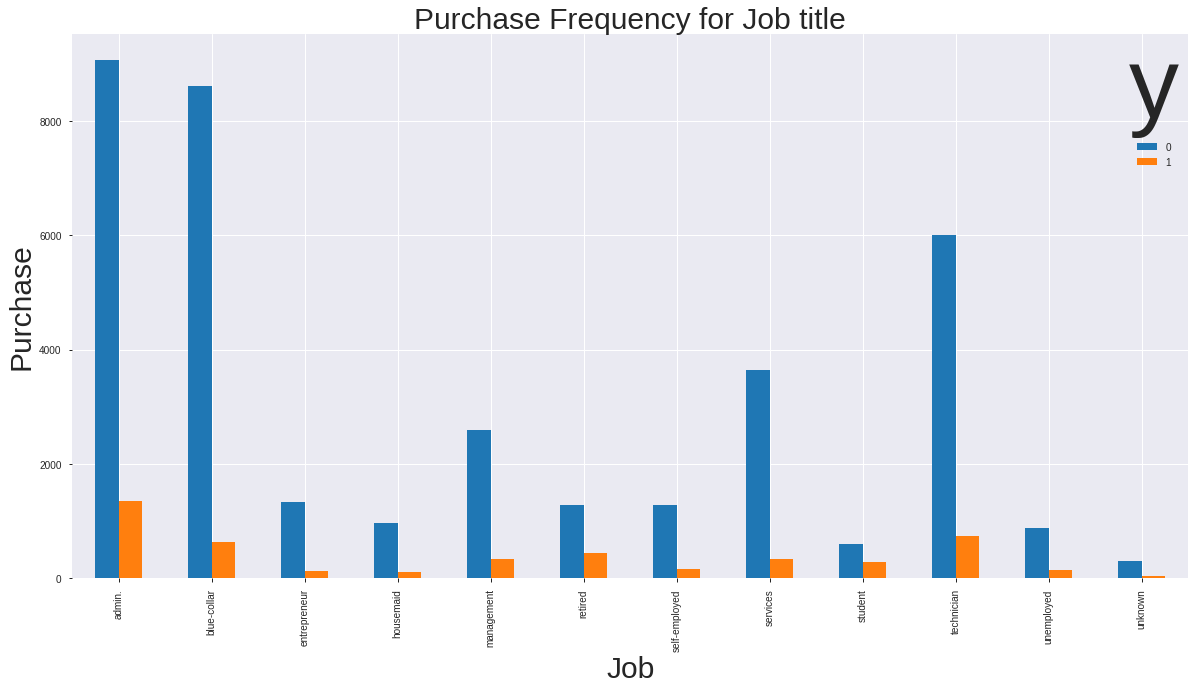

In [57]:
pd.crosstab(data["job"], data["y"]).plot(kind = "bar", figsize=(20,10))
plt.title('Purchase Frequency for Job title', fontsize = 30)
plt.xlabel("Job", fontsize = 30)
plt.ylabel('Purchase', fontsize = 30)

In [59]:
pd.crosstab(data["marital"], data["y"],normalize = True)


y,0,1
marital,,
divorced,0.100423,0.011560
married,0.543763,0.061468
single,0.241500,0.039343
unknown,0.001651,0.000291


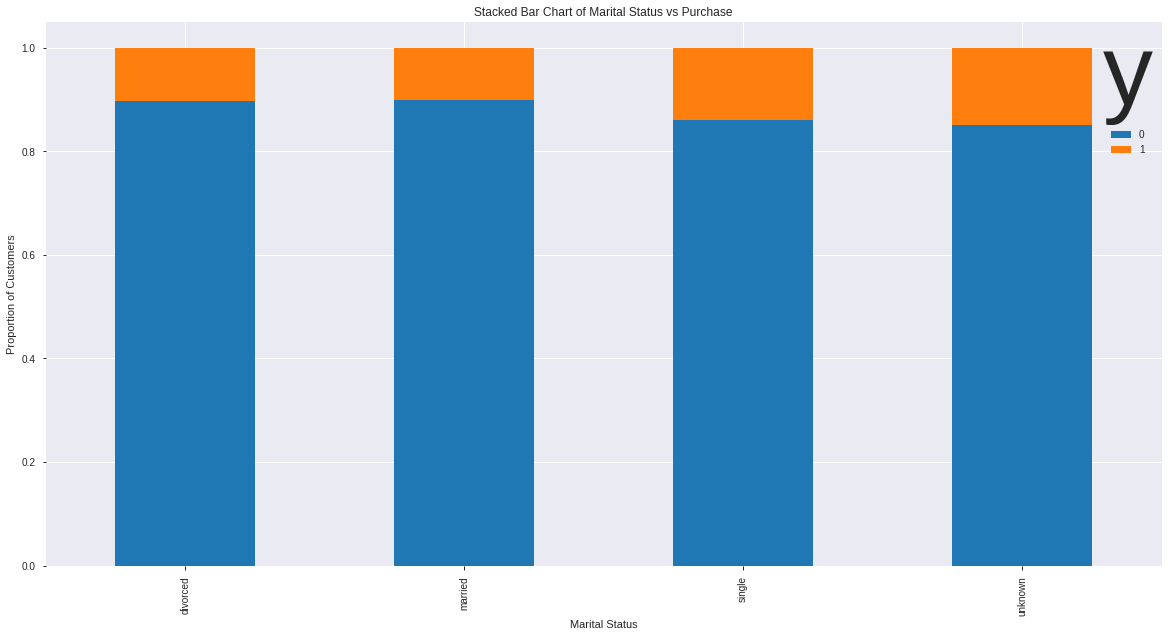

In [61]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (20,10))
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

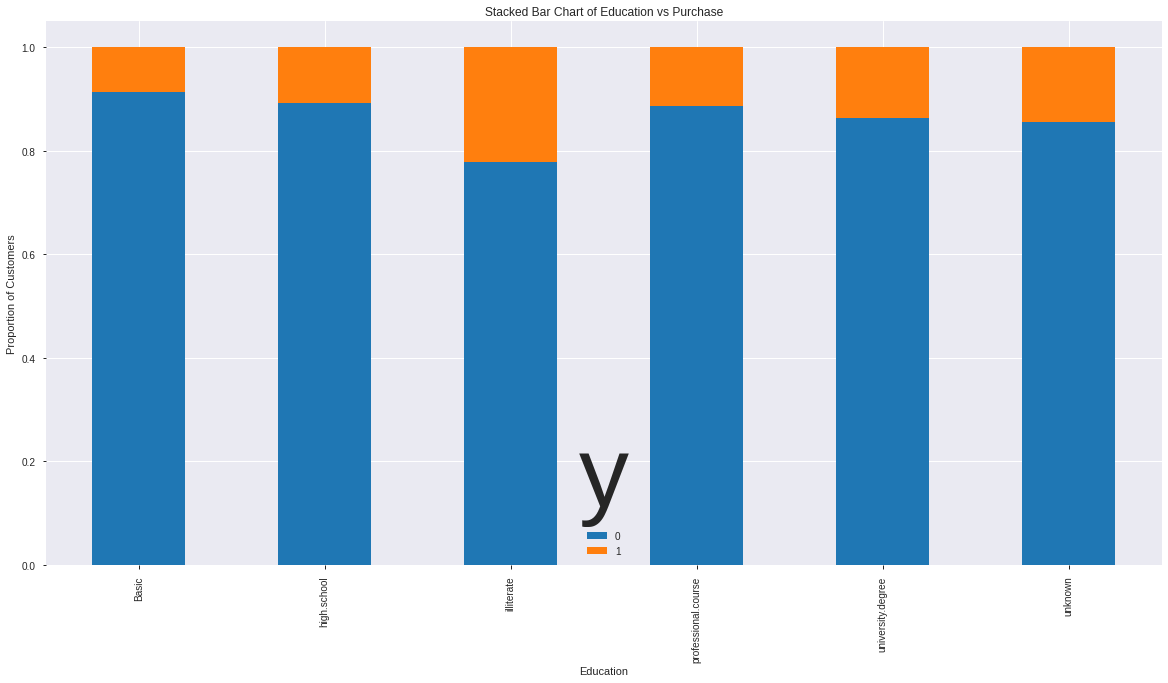

In [63]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (20,10))
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')


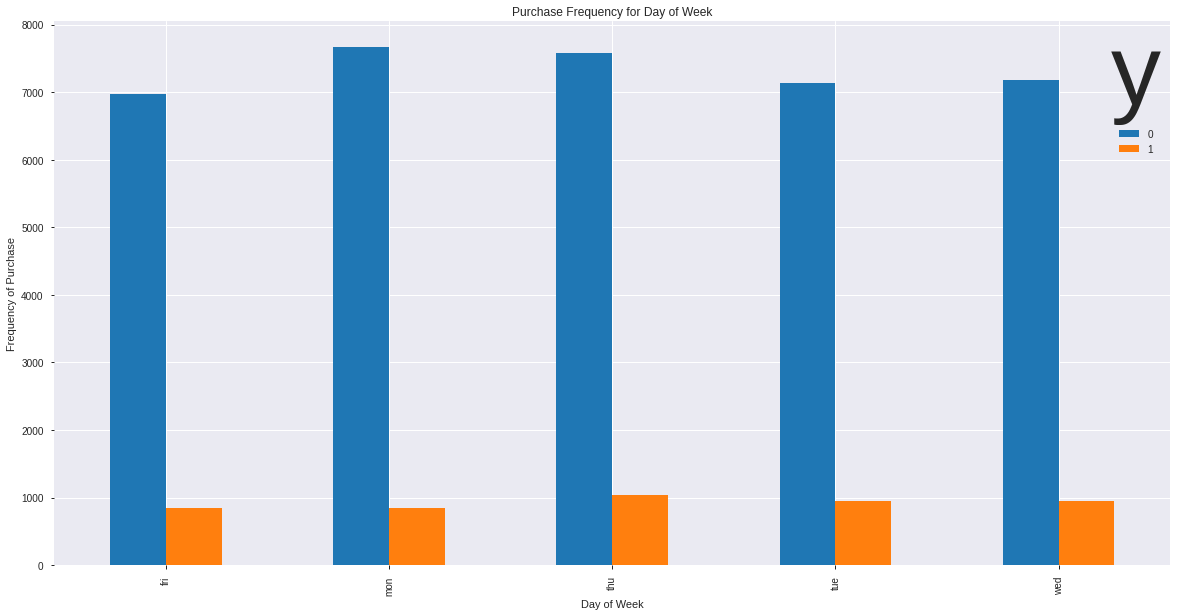

In [66]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar', figsize = (20,10))
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [71]:
data_numberical_columns = data.select_dtypes(include=np.number).drop(columns='y').columns

In [76]:
data_categorical_columns = data.select_dtypes(exclude=np.number).columns

In [78]:
#Create dummy for Category

data_encoded_category = pd.get_dummies(data[data_categorical_columns])

In [79]:
data_encoded_category.shape

(41176, 51)

In [85]:
data_preprocessed = pd.concat([data[data_numberical_columns], data_encoded_category, data['y']], axis = 1)

In [87]:
X = data_preprocessed.drop(columns='y')

In [88]:
y = data['y']

In [91]:
#Train Test split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 24)

In [92]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((28823, 61), (12353, 61), (28823,), (12353,))

In [94]:
data['y'].value_counts(normalize = True)

0    0.887337
1    0.112663
Name: y, dtype: float64

In [97]:
train_y.value_counts(normalize = True)

0    0.886514
1    0.113486
Name: y, dtype: float64

In [96]:
test_y.value_counts(normalize = True)

0    0.889258
1    0.110742
Name: y, dtype: float64


### Model Building



In [108]:
def run_model_validate(model, train_X, train_y, test_X, test_y):
  model.fit(train_X, train_y)
  pred_train = model.predict(train_X)
  pred_test = model.predict(test_X)
  print("Train Accuracy : ",accuracy_score(train_y, pred_train))
  print("Test Accuracy : ",accuracy_score(test_y, pred_test))

  print("Train F1 Score : ",f1_score(train_y, pred_train))
  print("Test F1 Score : ",f1_score(test_y, pred_test))

  print("Train Confusion Matrix : ",confusion_matrix(train_y, pred_train))
  print("Test Confusion Matrix : ",confusion_matrix(test_y, pred_test))

  print("Train Classification Report : ",classification_report(train_y, pred_train))
  print("Test Classification Report : ",classification_report(test_y, pred_test))

  return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test)

In [112]:

model = LogisticRegression(max_iter= 10000)
model_name, accuracy, f1score = run_model_validate(model, train_X, train_y, test_X, test_y)


Train Accuracy :  0.9103146792492107
Test Accuracy :  0.9104670930138428
Train F1 Score :  0.5114345114345115
Test F1 Score :  0.4981851179673321
Train Confusion Matrix :  [[24885   667]
 [ 1918  1353]]
Test Confusion Matrix :  [[10698   287]
 [  819   549]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.41      0.51      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.69      0.73     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.72     12353
weighted avg       0.90      0.91      0.90     12353



In [119]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, train_y, test_X, test_y)
  result.append([model_name, accuracy, f1score])



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.908545258994553
Test Accuracy :  0.9094956690682425
Train F1 Score :  0.49385560675883255
Test F1 Score :  0.482886216466235
Train Confusion Matrix :  [[24901   651]
 [ 1985  1286]]
Test Confusion Matrix :  [[10713   272]
 [  846   522]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.66      0.39      0.49      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.68      0.72     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.98      0.95     10985
           1       0.66      0.38      0.48      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy :  0.9112514311487354
Test Accuracy :  0.9112766129685097
Train F1 Score :  0.5193536264562195
Test F1 Score :  0.5013648771610555
Train Confusion Matrix :  [[24883   669]
 [ 1889  1382]]
Test Confusion Matrix :  [[10706   279]
 [  817   551]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.42      0.52      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.70      0.74     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.80      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.9099330395864413
Test Accuracy :  0.9103051890229095
Train F1 Score :  0.5092627599243856
Test F1 Score :  0.5
Train Confusion Matrix :  [[24880   672]
 [ 1924  1347]]
Test Confusion Matrix :  [[10691   294]
 [  814   554]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.41      0.51      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.69      0.73     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.65      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Accuracy :  0.9059778648995593
Test Accuracy :  0.9060956852586416
Train F1 Score :  0.43915562913907286
Test F1 Score :  0.4285714285714286
Train Confusion Matrix :  [[25052   500]
 [ 2210  1061]]
Test Confusion Matrix :  [[10758   227]
 [  933   435]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95     25552
           1       0.68      0.32      0.44      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.65      0.69     28823
weighted avg       0.89      0.91      0.89     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95     10985
           1       0.66      0.32      0.43      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.65      0.69     12353
weighted avg       0.89      0.91      0.89     12353

Train Accuracy :  0.93064

In [122]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.909496,0.482886
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.911277,0.501365
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.910305,0.500000
3,"LogisticRegression(C=1.0, class_weight=None, d...",0.906096,0.428571
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.907067,0.543720
5,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.882782,0.482117
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.913300,0.536564
7,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.908929,0.484182
8,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.916215,0.574949


In [123]:
result

[[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False), 0.9094956690682425, 0.482886216466235],
 [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False),
  0.9112766129685097,
  0.5013648771610555],
 [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                 

In [124]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))
estimators.append(('KNN', model3))

voting_model = VotingClassifier(estimators)

In [127]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.95236443118343
Test Accuracy :  0.9160527807010442
Train F1 Score :  0.7681134943421719
Test F1 Score :  0.5662902551233794
Train Confusion Matrix :  [[25176   376]
 [  997  2274]]
Test Confusion Matrix :  [[10639   346]
 [  691   677]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97     25552
           1       0.86      0.70      0.77      3271

    accuracy                           0.95     28823
   macro avg       0.91      0.84      0.87     28823
weighted avg       0.95      0.95      0.95     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.94      0.97      0.95     10985
           1       0.66      0.49      0.57      1368

    accuracy                           0.92     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.91      0.92      0.91     12353



In [128]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.9646809839364396
Test Accuracy :  0.9154051647373108
Train F1 Score :  0.8274576271186441
Test F1 Score :  0.5658496053178229
Train Confusion Matrix :  [[25364   188]
 [  830  2441]]
Test Confusion Matrix :  [[10627   358]
 [  687   681]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.97      0.99      0.98     25552
           1       0.93      0.75      0.83      3271

    accuracy                           0.96     28823
   macro avg       0.95      0.87      0.90     28823
weighted avg       0.96      0.96      0.96     28823

Test Classification Report :                precision    recall  f1-score   support

           0       0.94      0.97      0.95     10985
           1       0.66      0.50      0.57      1368

    accuracy                           0.92     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.91      0.92      0.91     12353



In [129]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.909496,0.482886
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.911277,0.501365
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.910305,0.500000
3,"LogisticRegression(C=1.0, class_weight=None, d...",0.906096,0.428571
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.907067,0.543720
5,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.882782,0.482117
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.913300,0.536564
7,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.908929,0.484182
8,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.916215,0.574949
9,"VotingClassifier(estimators=[('GBM',\n ...",0.916053,0.566290


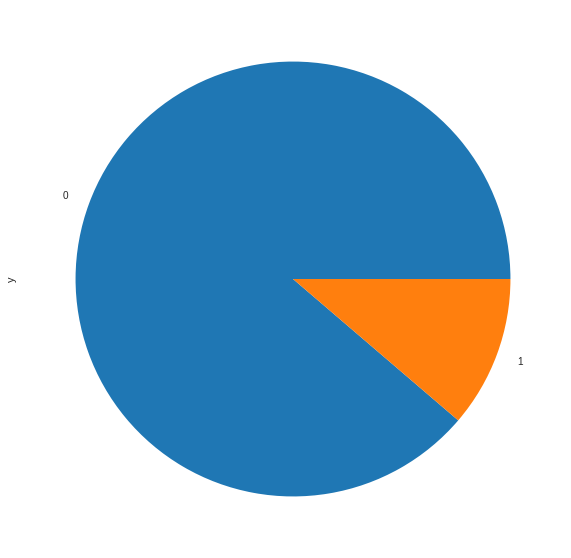

In [134]:
data["y"].value_counts().plot(kind = "pie", figsize = (10,10))

In [135]:
data_preprocessed.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [137]:
accept = data_preprocessed[data_preprocessed["y"]==1]

In [138]:
accept.shape

(4639, 62)

In [139]:
reject = data_preprocessed[data_preprocessed["y"]==0]

In [140]:
reject.shape

(36537, 62)

In [142]:
selected_reject = reject.sample(n = 4639, random_state= 20)

In [143]:
data_undersample = pd.concat([accept,selected_reject ])

In [145]:
data_undersample.shape

(9278, 62)

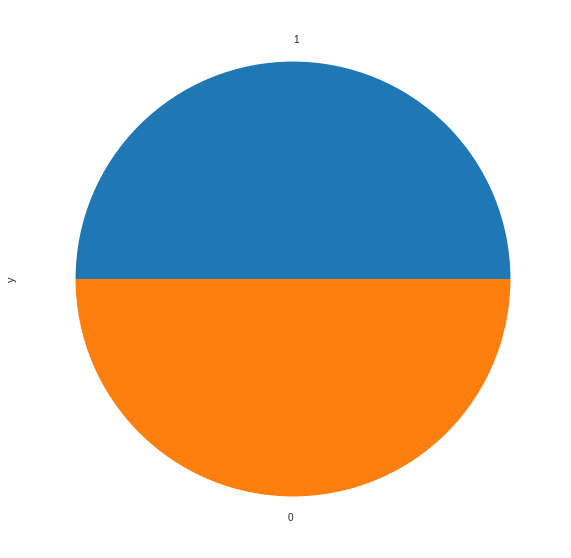

In [146]:
data_undersample["y"].value_counts().plot(kind = "pie", figsize = (10,10))

In [147]:
X = data_undersample.drop(columns='y')

In [148]:
y = data_undersample['y']

In [149]:
#Train Test split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 24)

In [150]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((6494, 61), (2784, 61), (6494,), (2784,))

In [152]:
data_undersample['y'].value_counts(normalize = True)

1    0.5
0    0.5
Name: y, dtype: float64

In [153]:
train_y.value_counts(normalize = True)

1    0.500154
0    0.499846
Name: y, dtype: float64

In [154]:
test_y.value_counts(normalize = True)

0    0.500359
1    0.499641
Name: y, dtype: float64

In [155]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, train_y, test_X, test_y)
  result.append([model_name, accuracy, f1score])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.8647982753310748
Test Accuracy :  0.8613505747126436
Train F1 Score :  0.8656259565350475
Test F1 Score :  0.8627311522048365
Train Confusion Matrix :  [[2788  458]
 [ 420 2828]]
Test Confusion Matrix :  [[1185  208]
 [ 178 1213]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.87      0.86      0.86      3246
           1       0.86      0.87      0.87      3248

    accuracy                           0.86      6494
   macro avg       0.86      0.86      0.86      6494
weighted avg       0.86      0.86      0.86      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.87      0.85      0.86      1393
           1       0.85      0.87      0.86      1391

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy :  0.8744995380351094
Test Accuracy :  0.8724856321839081
Train F1 Score :  0.8761586385047865
Test F1 Score :  0.8750439985920452
Train Confusion Matrix :  [[2796  450]
 [ 365 2883]]
Test Confusion Matrix :  [[1186  207]
 [ 148 1243]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.88      0.86      0.87      3246
           1       0.86      0.89      0.88      3248

    accuracy                           0.87      6494
   macro avg       0.87      0.87      0.87      6494
weighted avg       0.87      0.87      0.87      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.89      0.85      0.87      1393
           1       0.86      0.89      0.88      1391

    accuracy                           0.87      2784
   macro avg       0.87      0.87      0.87      2784
weighted avg       0.87      0.87      0.87      2784



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.862026485987065
Test Accuracy :  0.8577586206896551
Train F1 Score :  0.8624501074608535
Test F1 Score :  0.8587731811697575
Train Confusion Matrix :  [[2789  457]
 [ 439 2809]]
Test Confusion Matrix :  [[1184  209]
 [ 187 1204]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.86      0.86      0.86      3246
           1       0.86      0.86      0.86      3248

    accuracy                           0.86      6494
   macro avg       0.86      0.86      0.86      6494
weighted avg       0.86      0.86      0.86      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.86      0.85      0.86      1393
           1       0.85      0.87      0.86      1391

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Accuracy :  0.7802587003387742
Test Accuracy :  0.7823275862068966
Train F1 Score :  0.7619683069224353
Test F1 Score :  0.7610410094637224
Train Confusion Matrix :  [[2783  463]
 [ 964 2284]]
Test Confusion Matrix :  [[1213  180]
 [ 426  965]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.74      0.86      0.80      3246
           1       0.83      0.70      0.76      3248

    accuracy                           0.78      6494
   macro avg       0.79      0.78      0.78      6494
weighted avg       0.79      0.78      0.78      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.74      0.87      0.80      1393
           1       0.84      0.69      0.76      1391

    accuracy                           0.78      2784
   macro avg       0.79      0.78      0.78      2784
weighted avg       0.79      0.78      0.78      2784

Train Accuracy :  0.89251616877117

In [156]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.861351,0.862731
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.872486,0.875044
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.857759,0.858773
3,"LogisticRegression(C=1.0, class_weight=None, d...",0.782328,0.761041
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.849856,0.851983
5,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.834411,0.834945
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.890445,0.894719
7,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875000,0.876157
8,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.890445,0.894936


In [157]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')


estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))
estimators.append(('LR', model3))

voting_model = VotingClassifier(estimators)

In [158]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy :  0.9145364952263628
Test Accuracy :  0.8904454022988506
Train F1 Score :  0.9169037281030095
Test F1 Score :  0.8950808393532851
Train Confusion Matrix :  [[2877  369]
 [ 186 3062]]
Test Confusion Matrix :  [[1178  215]
 [  90 1301]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.94      0.89      0.91      3246
           1       0.89      0.94      0.92      3248

    accuracy                           0.91      6494
   macro avg       0.92      0.91      0.91      6494
weighted avg       0.92      0.91      0.91      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.85      0.89      1393
           1       0.86      0.94      0.90      1391

    accuracy                           0.89      2784
   macro avg       0.89      0.89      0.89      2784
weighted avg       0.89      0.89      0.89      2784



In [159]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy :  0.9320911610717586
Test Accuracy :  0.8904454022988506
Train F1 Score :  0.9341692789968652
Test F1 Score :  0.895225008588114
Train Confusion Matrix :  [[2924  322]
 [ 119 3129]]
Test Confusion Matrix :  [[1176  217]
 [  88 1303]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.96      0.90      0.93      3246
           1       0.91      0.96      0.93      3248

    accuracy                           0.93      6494
   macro avg       0.93      0.93      0.93      6494
weighted avg       0.93      0.93      0.93      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.84      0.89      1393
           1       0.86      0.94      0.90      1391

    accuracy                           0.89      2784
   macro avg       0.89      0.89      0.89      2784
weighted avg       0.89      0.89      0.89      2784



In [160]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.861351,0.862731
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.872486,0.875044
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.857759,0.858773
3,"LogisticRegression(C=1.0, class_weight=None, d...",0.782328,0.761041
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.849856,0.851983
5,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.834411,0.834945
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.890445,0.894719
7,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875000,0.876157
8,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.890445,0.894936
9,"VotingClassifier(estimators=[('GBM',\n ...",0.890445,0.895081


In [ ]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')



In [169]:
import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.45 (+/- 0.01) [GBM]
Accuracy: 0.45 (+/- 0.01) [Random Forest]
Accuracy: 0.56 (+/- 0.08) [Logistic Regression]
Accuracy: 0.45 (+/- 0.01) [StackingClassifier]


In [170]:



estimators = [('GBM', GradientBoostingClassifier()),
              ('RF', RandomForestClassifier()),
              ('LR', LogisticRegression(solver = 'liblinear',penalty='l1'))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [171]:
model_name, accuracy, f1score = run_model_validate(clf, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.9391746227286726
Test Accuracy :  0.8933189655172413
Train F1 Score :  0.9404492688074777
Test F1 Score :  0.8973384030418251
Train Confusion Matrix :  [[2980  266]
 [ 129 3119]]
Test Confusion Matrix :  [[1189  204]
 [  93 1298]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.96      0.92      0.94      3246
           1       0.92      0.96      0.94      3248

    accuracy                           0.94      6494
   macro avg       0.94      0.94      0.94      6494
weighted avg       0.94      0.94      0.94      6494

Test Classification Report :                precision    recall  f1-score   support

           0       0.93      0.85      0.89      1393
           1       0.86      0.93      0.90      1391

    accuracy                           0.89      2784
   macro avg       0.90      0.89      0.89      2784
weighted avg       0.90      0.89      0.89      2784



In [173]:
final_result = pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

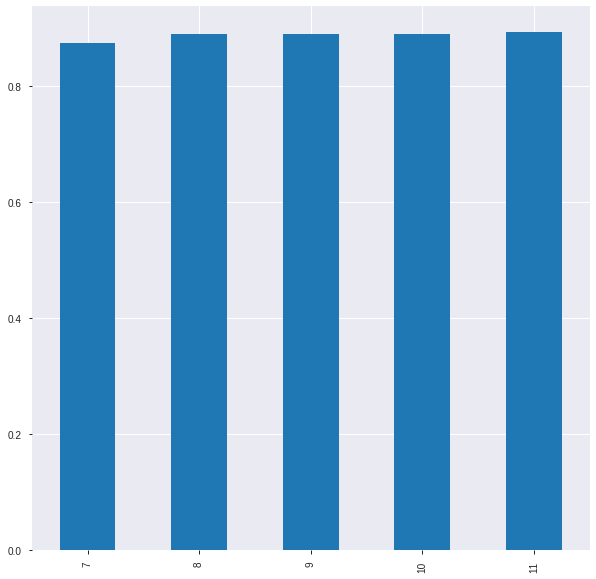

In [181]:
final_result["Accuracy"].tail().plot(kind = "bar", figsize = (10,10))